In [1]:
import os
import sys

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as pyplot
import scipy

WORKING_DIR_PATH = globals()['_dh'][0]
WORKING_DIR_PARENT_PATH = os.path.dirname(WORKING_DIR_PATH)
sys.path.insert(1, WORKING_DIR_PARENT_PATH)
from custom_module.utilities import (
    SAMPLE_HIPHOP_FILE_PATH,
    SAMPLE_POP_FILE_PATH,
    SAMPLE_ROCK_FILE_PATH,
    visualize_wavelet,
    GENRES
)

In [2]:
# get sample rate of audio file & load audio file as time series
sample_rate_hiphop = librosa.core.get_samplerate(SAMPLE_HIPHOP_FILE_PATH)
time_series_hiphop, _ = librosa.core.load(SAMPLE_HIPHOP_FILE_PATH, sample_rate_hiphop)

sample_rate_pop = librosa.core.get_samplerate(SAMPLE_POP_FILE_PATH)
time_series_pop, _ = librosa.core.load(SAMPLE_POP_FILE_PATH, sample_rate_pop)

sample_rate_rock = librosa.core.get_samplerate(SAMPLE_ROCK_FILE_PATH)
time_series_rock, _ = librosa.core.load(SAMPLE_ROCK_FILE_PATH, sample_rate_rock)

sample_signals = [
    [sample_rate_hiphop, time_series_hiphop], 
    [sample_rate_rock, time_series_rock], 
    [sample_rate_pop, time_series_pop]
]

### Most the code below this cell were adapted from the Librosa Documentation

# MFCC

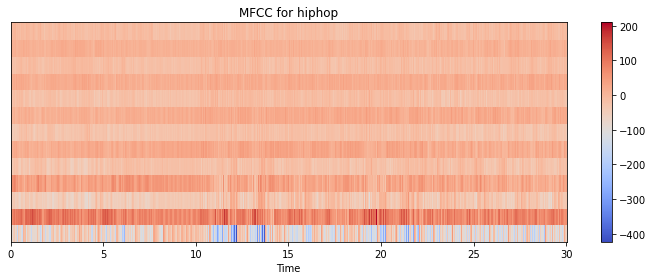

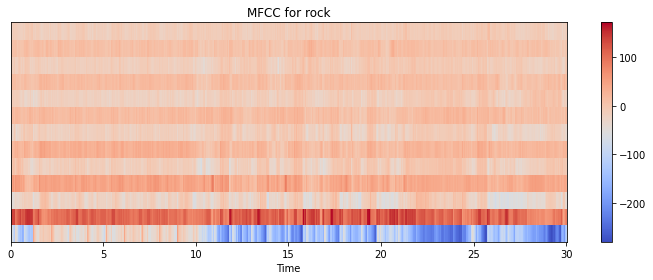

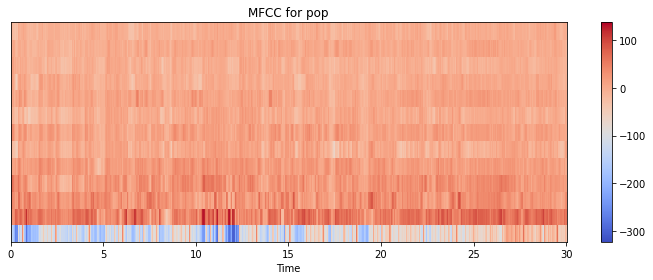

In [13]:
count = 0
for sample_rate, signal in sample_signals:
    # compute 13 mel-frequency cepstral coefficients
    mfccs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=13)

    # Plot mfcc
    pyplot.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    pyplot.colorbar()
    pyplot.title('MFCC' + ' for ' + GENRES[count])
    pyplot.tight_layout()
    count += 1
    
pyplot.show()

# Spectral Centroid

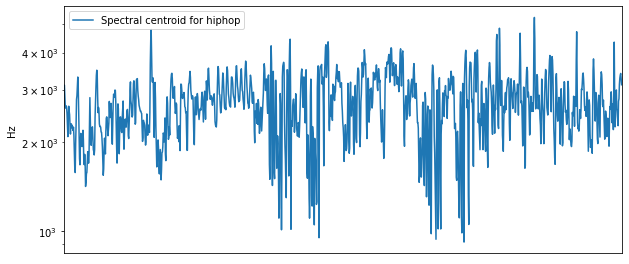

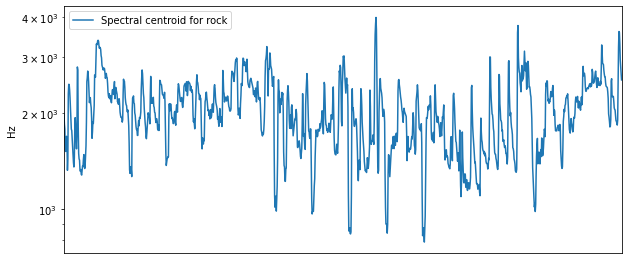

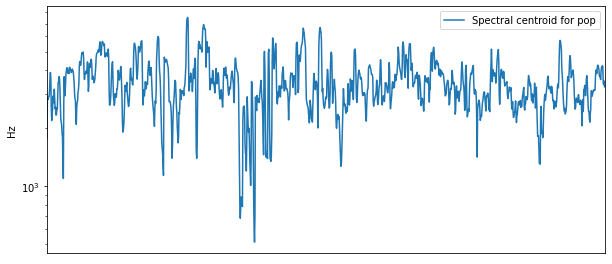

In [14]:
count = 0
for sample_rate, signal in sample_signals:
    # compute spectral centroid
    spec_centroid = librosa.feature.spectral_centroid(signal, sample_rate)

    # plot spectral centriod
    pyplot.figure(figsize=(10, 10))
    pyplot.subplot(2, 1, 1)
    pyplot.semilogy(spec_centroid.T, label='Spectral centroid' + ' for ' + GENRES[count])
    pyplot.ylabel('Hz')
    pyplot.xticks([])
    pyplot.xlim([0, spec_centroid.shape[-1]])
    pyplot.legend()
    count += 1
    
pyplot.show()

# Spectral Bandwidth

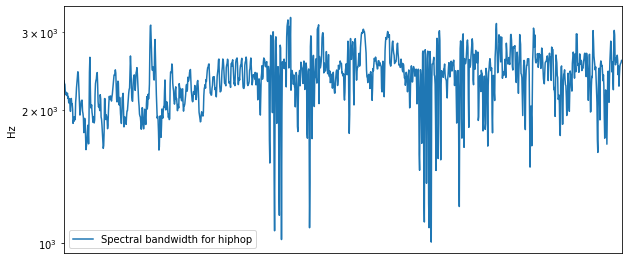

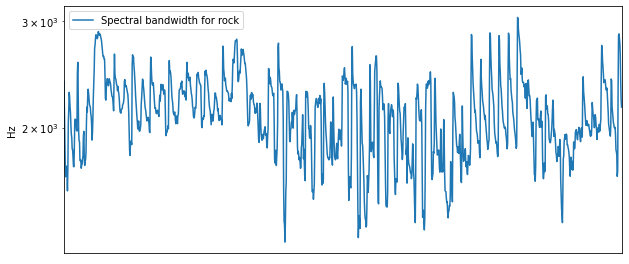

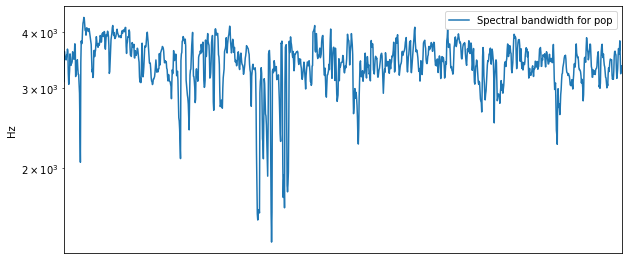

In [15]:
count = 0
for sample_rate, signal in sample_signals:
    # compute spectral centroid
    spec_bw = librosa.feature.spectral_bandwidth(signal, sample_rate)

    # plot spectral centriod
    pyplot.figure(figsize=(10, 10))
    pyplot.subplot(2, 1, 1)
    pyplot.semilogy(spec_bw.T, label='Spectral bandwidth' + ' for ' + GENRES[count])
    pyplot.ylabel('Hz')
    pyplot.xticks([])
    pyplot.xlim([0, spec_bw.shape[-1]])
    pyplot.legend()
    count += 1
    
pyplot.show()

# Spectral Contrast

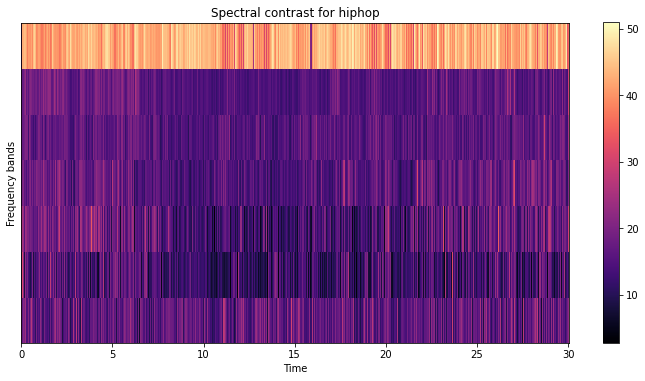

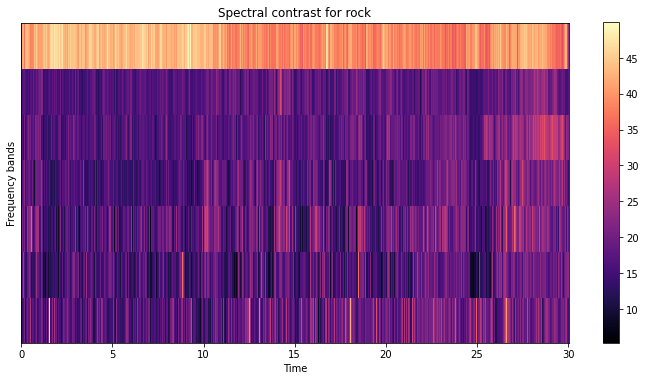

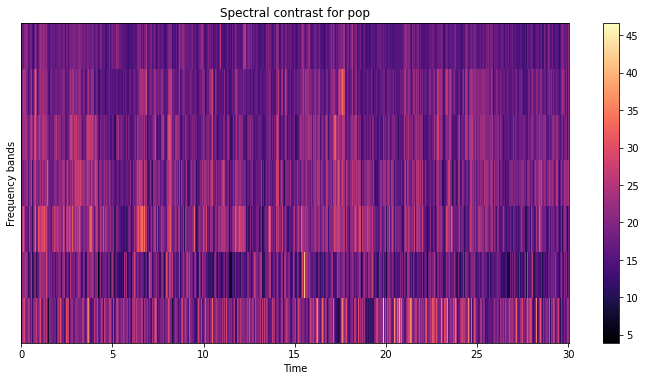

In [19]:
count = 0
for sample_rate, signal in sample_signals:
    # compute spectral contrast
    spec_contrast = librosa.feature.spectral_contrast(signal, sample_rate)

    # plot spectral contrast
    pyplot.figure(figsize=(10, 10))
    pyplot.subplot(2, 1, 2)
    librosa.display.specshow(spec_contrast, x_axis='time')
    pyplot.colorbar()
    pyplot.ylabel('Frequency bands')
    pyplot.title('Spectral contrast' + ' for ' + GENRES[count])
    pyplot.tight_layout()
    count += 1

# Spectral Roll-off

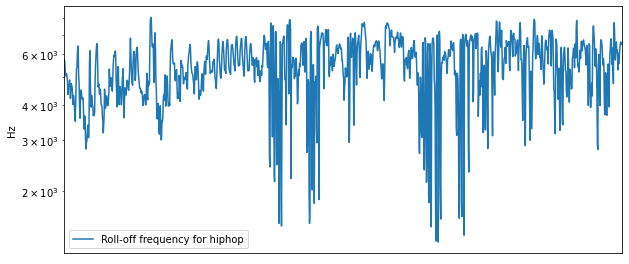

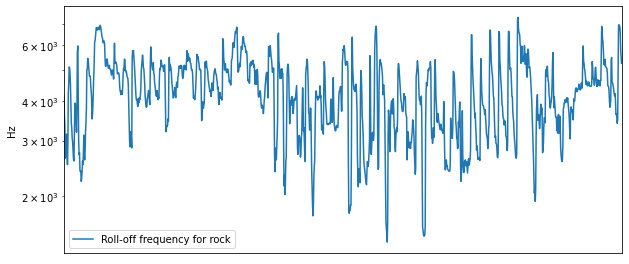

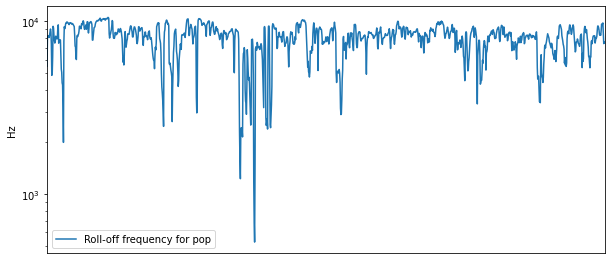

In [20]:
count = 0
for sample_rate, signal in sample_signals:
    # compute spectral roll-off
    spec_rolloff = librosa.feature.spectral_rolloff(signal, sample_rate)

    # plot spectral roll-off
    pyplot.figure(figsize=(10, 10))
    pyplot.subplot(2, 1, 1)
    pyplot.semilogy(spec_rolloff.T, label='Roll-off frequency' + ' for ' + GENRES[count])
    pyplot.ylabel('Hz')
    pyplot.xticks([])
    pyplot.xlim([0, spec_rolloff.shape[-1]])
    pyplot.legend()
    count += 1

# LPC

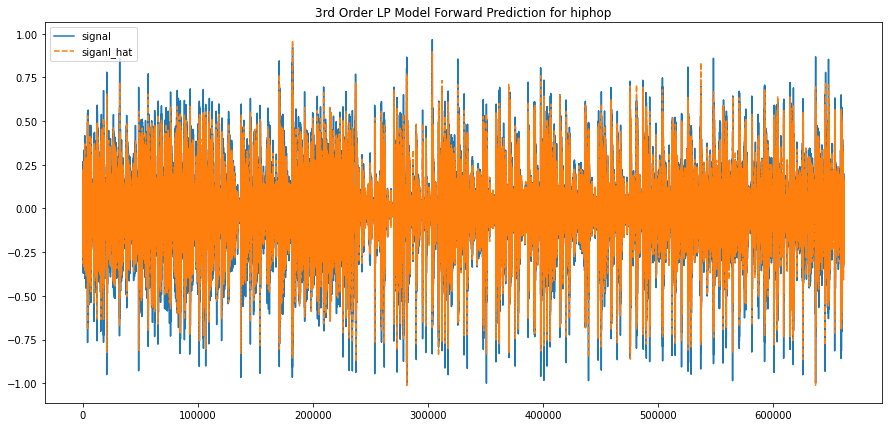

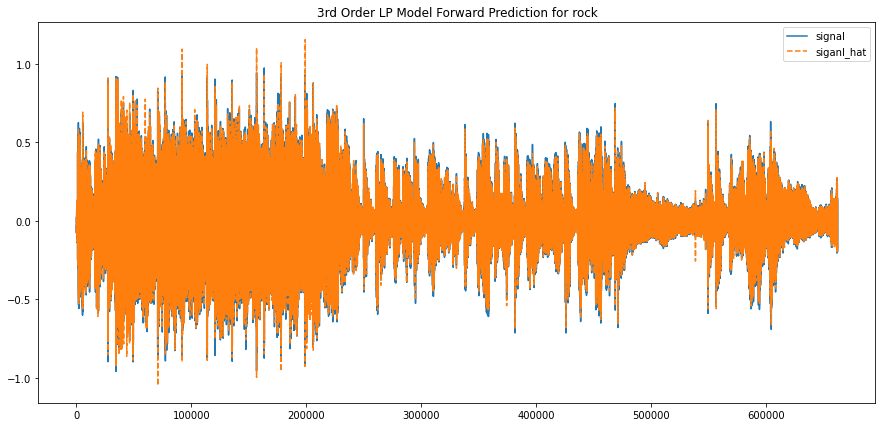

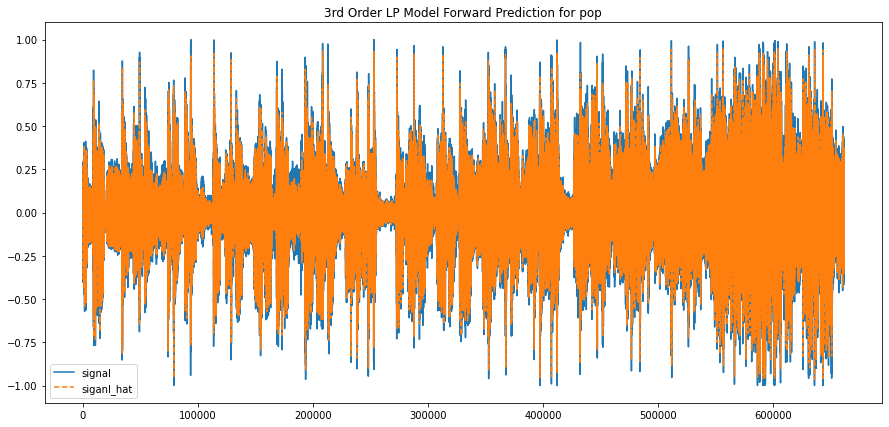

In [22]:
count = 0
for sample_rate, signal in sample_signals:
    # compute 3rd order lpc
    lpc = librosa.lpc(signal, 3)

    # filter data along one-dimension with an IIR or FIR filter.
    signal_hat = scipy.signal.lfilter([0] + -1*lpc[1:], [1], signal)

    # plot lpc
    pyplot.figure(figsize=(15, 7))
    pyplot.plot(signal)
    pyplot.plot(signal_hat, linestyle='--')
    pyplot.legend(['signal', 'siganl_hat'])
    pyplot.title('3rd Order LP Model Forward Prediction' + ' for ' + GENRES[count])
    count += 1
pyplot.show()

# Wavelet

---- --- ------ ----------- ----------------------- ----------- ----------
Db4 wavelet for hiphop


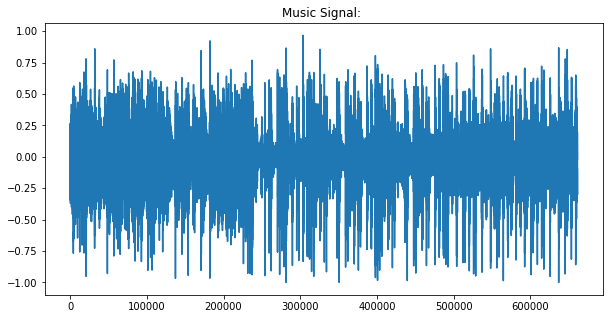

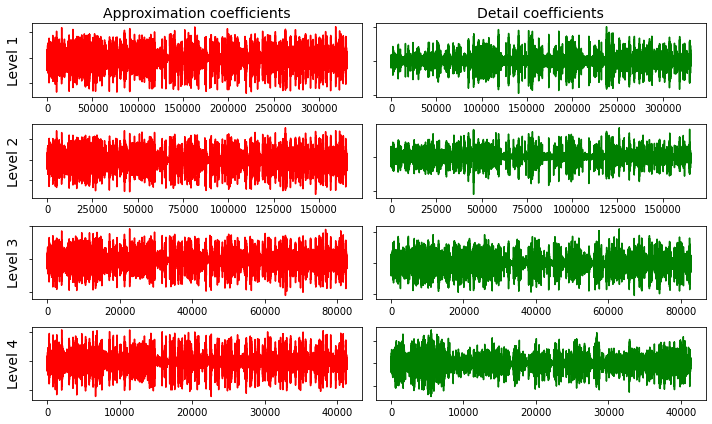

---- --- ------ ----------- ----------------------- ----------- ----------
Db4 wavelet for rock


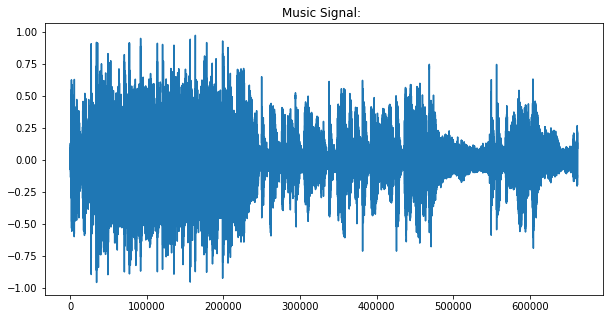

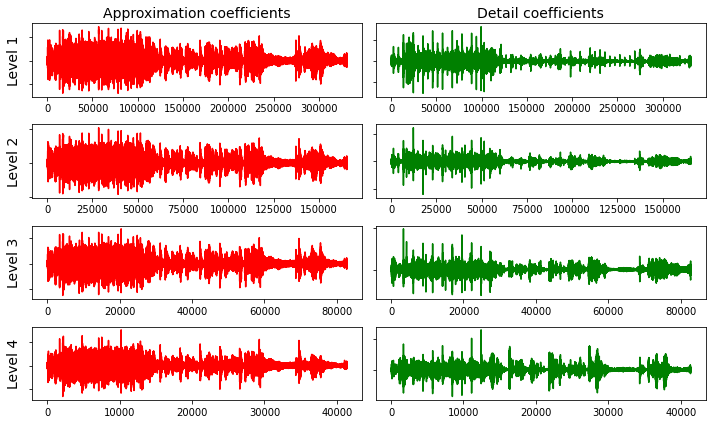

---- --- ------ ----------- ----------------------- ----------- ----------
Db4 wavelet for pop


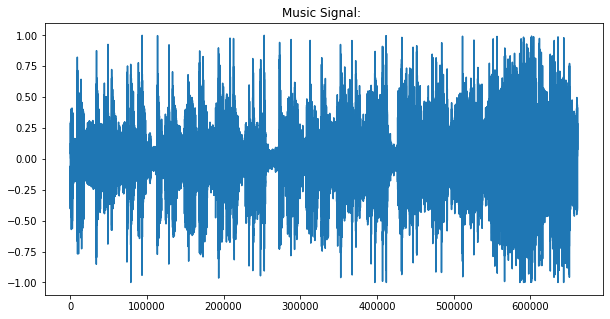

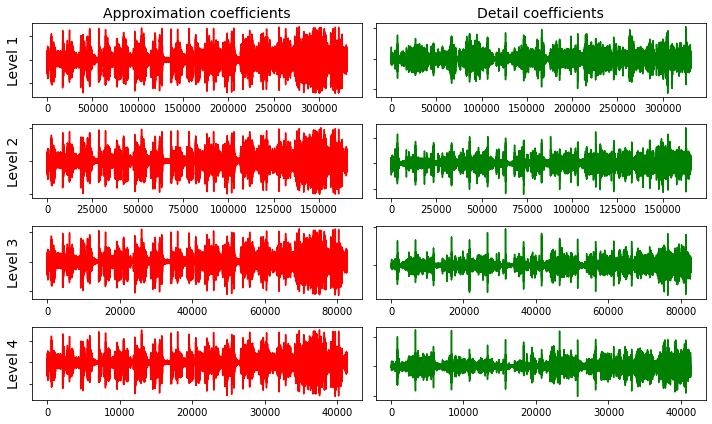

In [25]:
count = 0
for sample_rate, signal in sample_signals:
    # visualize db4 wavelet for 1 - 4 levels of decomposition
    print('---- --- ------ ----------- ----------------------- ----------- ----------')
    print( 'Db4 wavelet for ' + GENRES[count])
    visualize_wavelet(signal, 'db4', 4)
    count += 1

---- --- ------ ----------- ----------------------- ----------- ----------
Db5 wavelet for hiphop


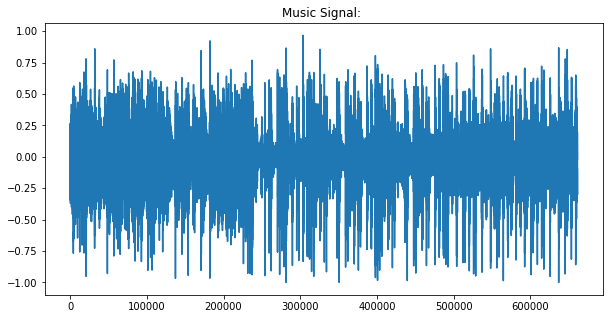

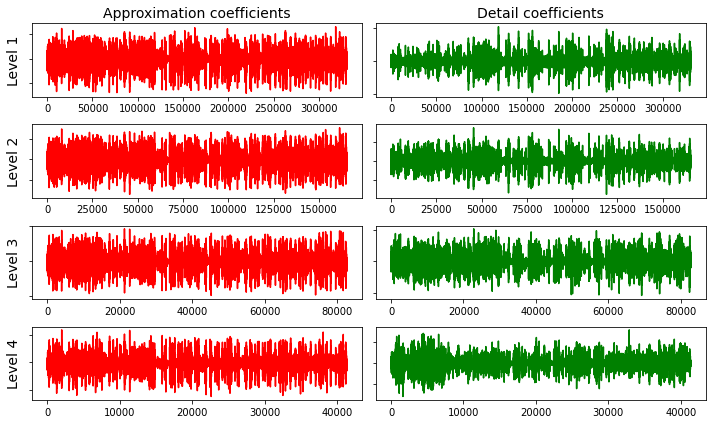

---- --- ------ ----------- ----------------------- ----------- ----------
Db5 wavelet for rock


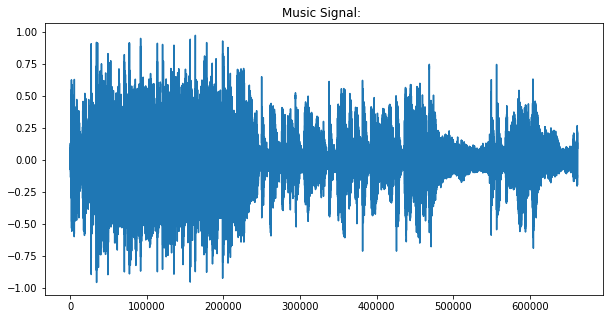

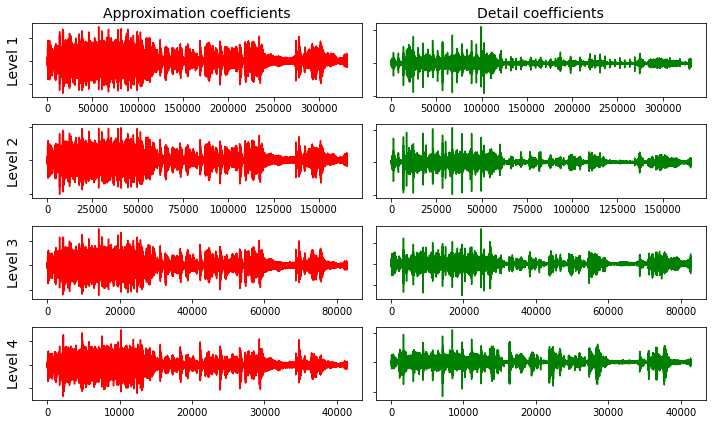

---- --- ------ ----------- ----------------------- ----------- ----------
Db5 wavelet for pop


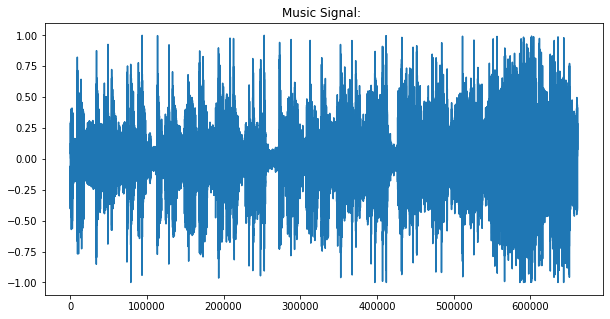

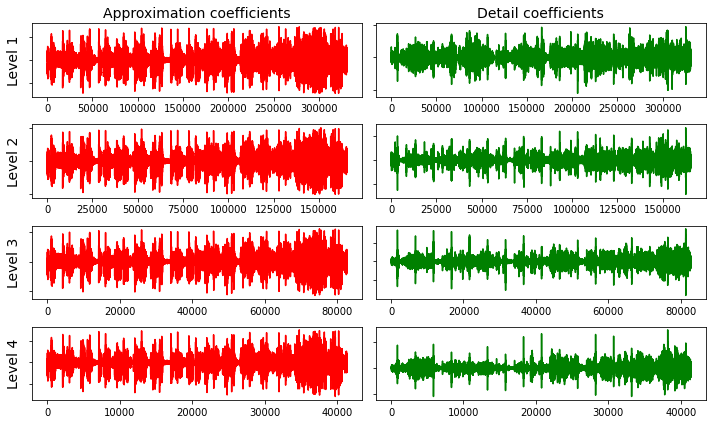

In [26]:
count = 0
for sample_rate, signal in sample_signals:
    # visualize db5 wavelet for 1 - 4 levels of decomposition
    print('---- --- ------ ----------- ----------------------- ----------- ----------')
    print( 'Db5 wavelet for ' + GENRES[count])
    visualize_wavelet(signal, 'db5', 4)
    count += 1

---- --- ------ ----------- ----------------------- ----------- ----------
Db8 wavelet for hiphop


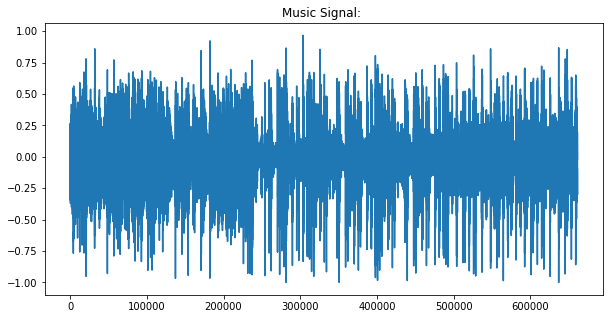

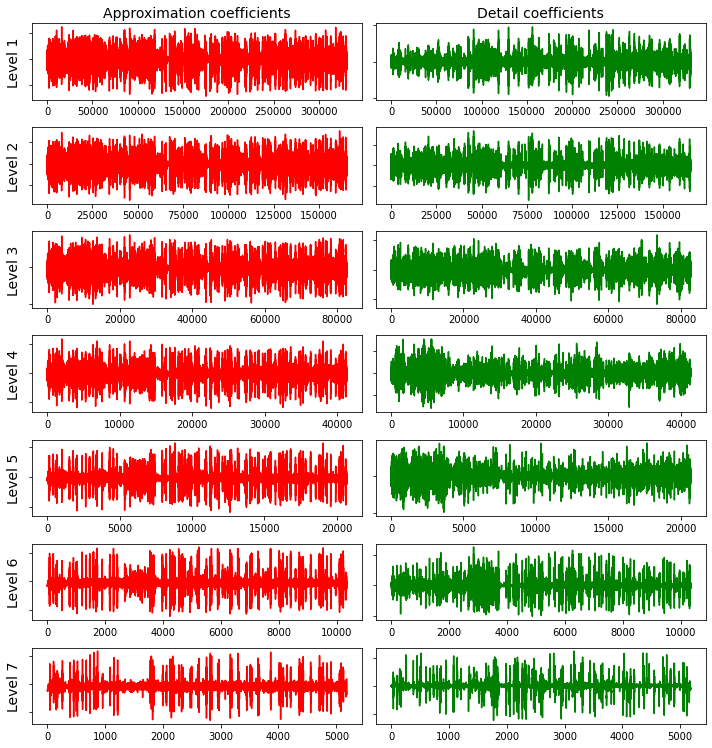

---- --- ------ ----------- ----------------------- ----------- ----------
Db8 wavelet for rock


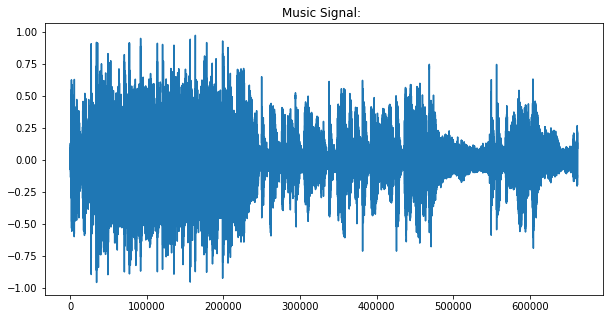

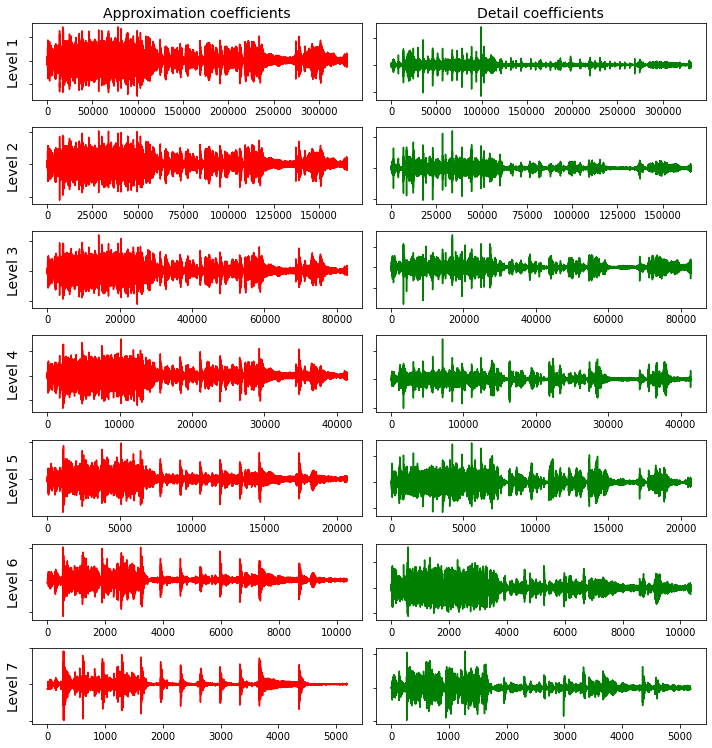

---- --- ------ ----------- ----------------------- ----------- ----------
Db8 wavelet for pop


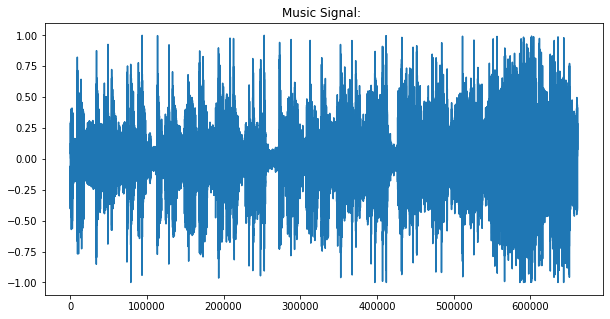

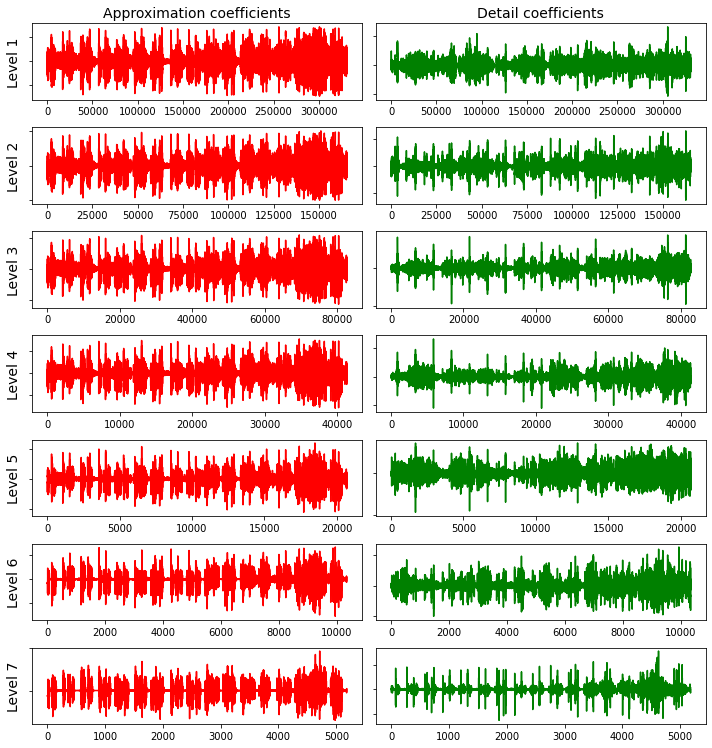

In [27]:
count = 0
for sample_rate, signal in sample_signals:
    # visualize db8 wavelet for 1 - 7 levels of decomposition
    print('---- --- ------ ----------- ----------------------- ----------- ----------')
    print( 'Db8 wavelet for ' + GENRES[count])
    visualize_wavelet(signal, 'db8', 7)
    count += 1